In [1]:
import sys
sys.path.append("../NN")
from FNNRegressor import FNNRegressor

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


### Simple Linear regression Test

In [2]:
# Activation function

def identity(x):
    return x

def d_identity(x):
    return 1

In [3]:
bias = 100
X, y, coef = make_regression(n_samples=100, 
                             n_features=1, 
                             bias= bias,
                             noise=20, random_state=28, coef=True)

coef = float(coef)
print(f"Generamos una matriz de {X.shape[0]} de observaciones de {X.shape[1]} atributos\n" + 
      f"Target en el rango {(round(min(y),2), round(max(y),2))}\n" + 
      f"los coeficientes con los que fueron generados son: {coef}")

print(f"Y = {bias} + {str(round(coef,2))} * X1 + ε")


Generamos una matriz de 100 de observaciones de 1 atributos
Target en el rango (np.float64(-130.96), np.float64(316.74))
los coeficientes con los que fueron generados son: 85.653765028142
Y = 100 + 85.65 * X1 + ε


In [4]:
def minimizacion_analitica(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    col_ones = np.ones((X.shape[0], 1))
    X_ext = np.hstack((col_ones, X))
    X_XT_inv = np.linalg.inv(X_ext.T @ X_ext)
    w_analitico = (X_XT_inv @ X_ext.T) @ y

    return w_analitico

w_analitico = minimizacion_analitica(X, y)
print(f"Los coeficientes obtenidos por minimización analítica son: {w_analitico}")
y_pred_analitico = w_analitico[0] + w_analitico[1] * X.flatten()
mse_analitico = mean_squared_error(y, y_pred_analitico)
print(f"MSE analítico: {mse_analitico}")

Los coeficientes obtenidos por minimización analítica son: [100.03732334  86.04228725]
MSE analítico: 447.398746893237


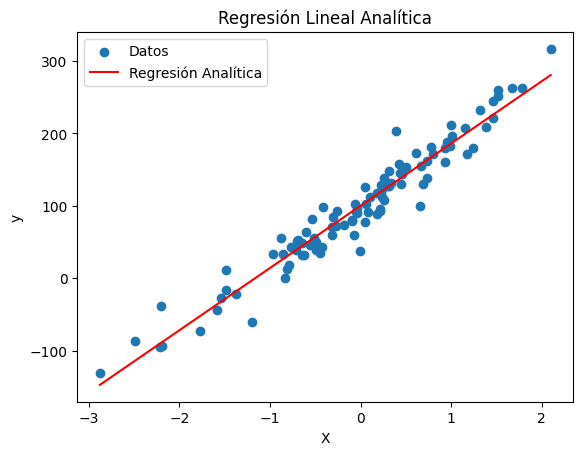

In [5]:
plt.scatter(X, y, label='Datos')
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = w_analitico[0] + w_analitico[1] * x_line
plt.plot(x_line, y_line, color='red', label='Regresión Analítica')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regresión Lineal Analítica')
plt.show()

In [6]:
hiperparametros = {
    'd': [1, 1, 1],
    'nabla': 0.001,
    'phi': identity,
    'd_phi': d_identity,
    'max_iter': 2000,
    'eps': 1e-3
}

model = FNNRegressor(**hiperparametros)
model.fit(X, y)
print(f"Los coeficiente: {model.W}")
print(f"El bias: {model.B}")
print("Score:", model.score(X, y))

Training completed in 1033 epochs; MSE: 447.3987
Los coeficiente: {(1, 1, 1): array([-11.53489745]), (2, 1, 1): array([-7.45929244])}
El bias: {(1, 1): array([24.93475386]), (2, 1): array([85.95824304])}
Score: 447.39874690898387


Muy cerca al MSE original

FNNRegressor explota si 'd': [1, 1]

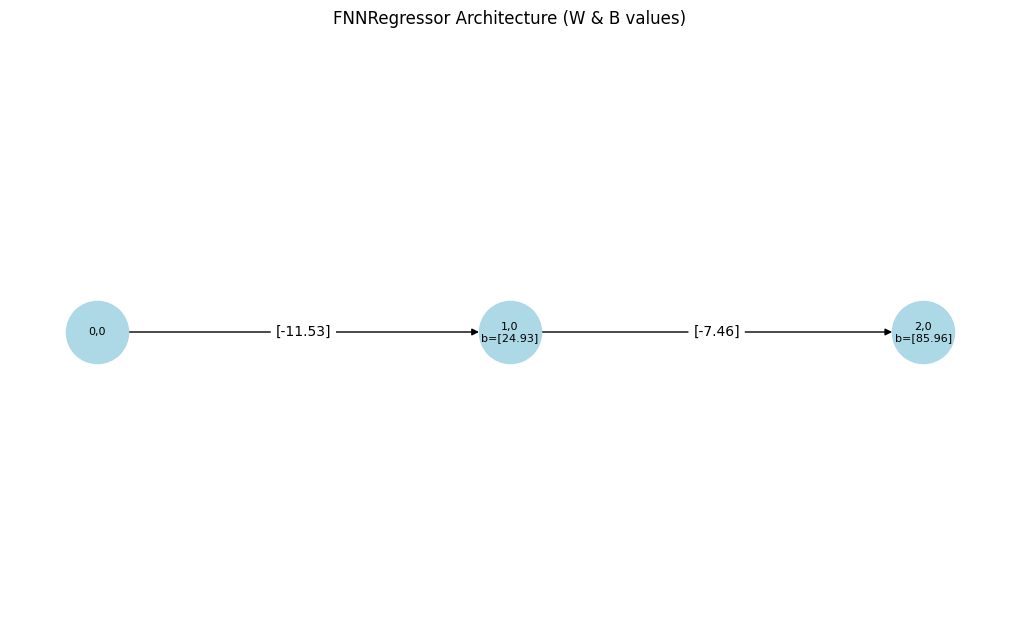

In [7]:
model.plot()